In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [9]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from sklearn.datasets import load_iris

In [10]:
# from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data_cancer.csv')
# df = pd.read_excel("xxx.xls", sheet_name="sheet 1")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
test_X = df.iloc[0:10,[2,3,4,5]].values
print(test_X.shape)

(10, 4)


In [13]:
X = df.iloc[:,[2,3,4,5]].values
Y = df.iloc[:,[1]].values

In [14]:
print(Y)

[['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['M']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']
 ['B']
 ['M']
 ['B']

In [15]:
target_names = df['diagnosis'].unique()
print(target_names)

['M' 'B']


In [16]:
print(X.shape)
print(Y.shape)

(569, 4)
(569, 1)


In [17]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, random_state=3, test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(455, 4)
(114, 4)
(455, 1)
(114, 1)


In [19]:
# define the dictionary of models our script can use, where the key
# to the dictionary is the name of the model (supplied via command
# line argument) and the value is the model itself
models = {
	"knn": KNeighborsClassifier(n_neighbors=3),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel="rbf", gamma="auto"),
	"decision_tree": DecisionTreeClassifier(),
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier()
}

In [20]:
# train the model
print("[INFO] using '{}' model".format("knn"))
model = models["knn"]
model.fit(trainX, trainY)

[INFO] using 'knn' model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(predictions)

[INFO] evaluating...
['B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'B']


In [22]:
print(classification_report(testY, predictions,
	target_names=target_names))

              precision    recall  f1-score   support

           M       0.89      0.92      0.91        74
           B       0.84      0.80      0.82        40

    accuracy                           0.88       114
   macro avg       0.87      0.86      0.86       114
weighted avg       0.88      0.88      0.88       114



In [23]:
# train the model
print("[INFO] using '{}' model".format("naive_bayes"))
model = models["naive_bayes"]
model.fit(trainX, trainY)

[INFO] using 'naive_bayes' model


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.89      0.96      0.92        74
           B       0.91      0.78      0.84        40

    accuracy                           0.89       114
   macro avg       0.90      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



In [25]:
# train the model
print("[INFO] using '{}' model".format("logit"))
model = models["logit"]
model.fit(trainX, trainY)

[INFO] using 'logit' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.93      0.93      0.93        74
           B       0.88      0.88      0.88        40

    accuracy                           0.91       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [27]:
# train the model
print("[INFO] using '{}' model".format("svm"))
model = models["svm"]
model.fit(trainX, trainY)

[INFO] using 'svm' model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.66      1.00      0.80        74
           B       1.00      0.05      0.10        40

    accuracy                           0.67       114
   macro avg       0.83      0.53      0.45       114
weighted avg       0.78      0.67      0.55       114



In [29]:
# train the model
print("[INFO] using '{}' model".format("decision_tree"))
model = models["decision_tree"]
model.fit(trainX, trainY)

[INFO] using 'decision_tree' model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.92      0.92      0.92        74
           B       0.85      0.85      0.85        40

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



In [31]:
# train the model
print("[INFO] using '{}' model".format("random_forest"))
model = models["random_forest"]
model.fit(trainX, trainY)

[INFO] using 'random_forest' model


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.91      0.95      0.93        74
           B       0.89      0.82      0.86        40

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



In [33]:
# train the model
print("[INFO] using '{}' model".format("mlp"))
model = models["mlp"]
model.fit(trainX, trainY)

[INFO] using 'mlp' model


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
# make predictions on our data and show a classification report
print("[INFO] evaluating...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=target_names))

[INFO] evaluating...
              precision    recall  f1-score   support

           M       0.89      0.95      0.92        74
           B       0.89      0.78      0.83        40

    accuracy                           0.89       114
   macro avg       0.89      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114



# **Artificial Neural Network**

In [35]:
# import the necessary packages
from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
# from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from PIL import Image
# from imutils import paths
# import numpy as np
# import os

In [36]:
Y

array([['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
      

In [37]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(Y)
print(labels)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


In [38]:
(trainX, testX, trainY, testY) = train_test_split(X,	np.array(labels), test_size=0.2)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(455, 4)
(114, 4)
(455, 1)
(114, 1)


In [39]:
#model ANN

model = Sequential(
    [
        Dense(32, activation="relu", input_shape=(4,)), #hidden layer 1
        Dense(16, activation="relu"), #hidden layer 2
        # Dense(16, activation="relu"),
        # Dense(8, activation="relu"),
        Dense(1, activation = "sigmoid"),
    ]
)

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [41]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="binary_crossentropy", optimizer=opt, #2 kelas --> binary_crossentropy
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=20)

[INFO] training network...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
23/23 [==============================] - 14s 31ms/step - loss: 61.7250 - accuracy: 0.6110 - val_loss: 5.1575 - val_accuracy: 0.6491
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 3.1396 - accuracy: 0.5255 - val_loss: 1.1213 - val_accuracy: 0.6491
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.9128 - accuracy: 0.5166 - val_loss: 0.4468 - val_accuracy: 0.8421
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8440 - val_loss: 0.4022 - val_accuracy: 0.8246
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8490 - val_loss: 0.3968 - val_accuracy: 0.8070
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8576 - val_loss: 0.3744 - val_accuracy: 0.8421
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8760 - val_loss: 0.3716 - val_accuracy: 0.8246
Epoch 8/20
23/23 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


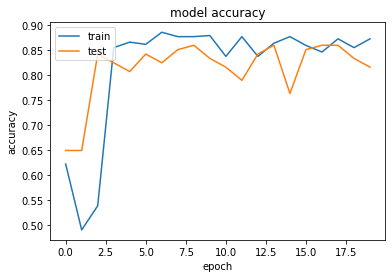

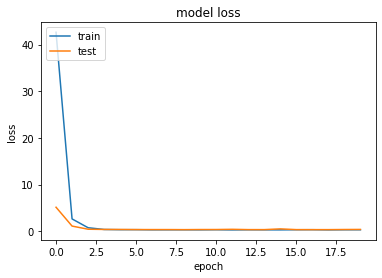

In [42]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#**PCA**

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
from sklearn import decomposition
from sklearn import datasets 

In [47]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

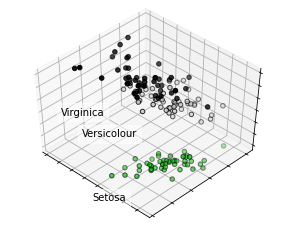

In [58]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, 
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# **LDA**

In [76]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [77]:
iris = datasets.load_iris()

x = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(x)

print('explained variance ratio (first two components): %s'
        % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.92461872 0.05306648]


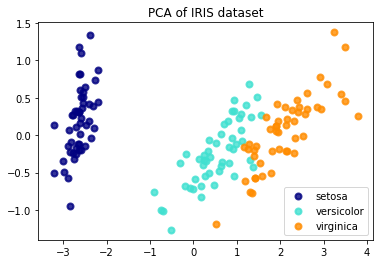

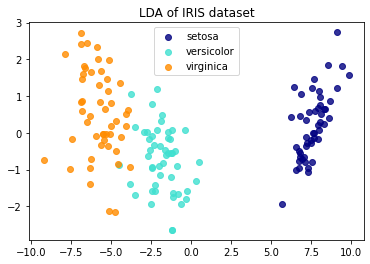

In [78]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1],  alpha=.8, color=color,
              label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# **FA**

In [80]:
from sklearn.decomposition import FactorAnalysis

In [81]:
fa = FactorAnalysis(n_components=2)
iris_two_dim = fa.fit_transform(iris.data)
iris_two_dim[:5]

array([[-1.32761727, -0.56131076],
       [-1.33763854, -0.00279765],
       [-1.40281483,  0.30634949],
       [-1.30104274,  0.71882683],
       [-1.33342439, -0.36458899]])